## **09-02 워드투벡터(Word2Vec)**

https://wikidocs.net/22660

앞서 원-핫 벡터는 단어 벡터 간 유의미한 유사도를 계산할 수 없다는 단점이 있음을 언급한 적이 있습니다. 그래서 단어 벡터 간 유의미한 유사도를 반영할 수 있도록 단어의 의미를 수치화 할 수 있는 방법이 필요합니다. 이를 위해서 사용되는 대표적인 방법이 워드투벡터(Word2Vec)입니다. Word2Vec의 개념을 설명하기 앞서 Word2Vec가 어떤 일을 할 수 있는지 확인해보겠습니다.

![image](https://wikidocs.net/images/page/22660/word2vec.PNG)

http://w.elnn.kr/search/

위 사이트는 한국어 단어에 대해서 벡터 연산을 해볼 수 있는 사이트입니다. 위 사이트에서는 단어들(실제로는 Word2Vec 벡터)로 더하기, 빼기 연산을 할 수 있습니다. 예를 들어 아래의 식에서 좌변을 집어 넣으면, 우변의 답들이 나옵니다.  
  
한국 - 서울 + 도쿄 = 일본   
박찬호 - 야구 + 축구 = 호나우두  
  
신기하게도 단어가 가지고 있는 의미들을 가지고 연산을 하고 있는 것처럼 보입니다. 이런 연산이 가능한 이유는 **각 단어 벡터가 단어 벡터 간 유사도를 반영한 값을 가지고 있기 때문** 입니다. 어떻게 가능한 것일까요?  

### **1. 희소 표현(Sparse Representation)**
앞서 원-핫 인코딩을 통해서 얻은 원-핫 벡터는 표현하고자 하는 단어의 인덱스의 값만 1이고, 나머지 인덱스에는 전부 0으로 표현되는 벡터 표현 방법이었습니다. 이와 같이 벡터 또는 행렬의 값이 대부분이 0으로 표현되는 방법을 **희소 표현(sparse representation)** 이라고 합니다.

하지만 이러한 표현 방법은 각 단어 벡터간 유의미한 유사성을 표현할 수 없다는 단점이 있었고, 대안으로 단어의 의미를 다차원 공간에 벡터화하는 방법을 사용하는데 이러한 표현을 **분산 표현(distributed representation)** 이라고 합니다. 그리고 분산 표현을 이용하여 단어 간 의미적 유사성을 벡터화하는 작업을 워드 임베딩(embedding)이라 부르며 이렇게 표현된 벡터를 **임베딩 벡터(embedding vector)** 라고 합니다.



### **2. 분산 표현(Distributed Representation)**
**분산 표현(distributed representation)** 방법은 기본적으로 **분포 가설(distributional hypothesis)** 이라는 가정 하에 만들어진 표현 방법입니다. 이 가정은 **'비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다'** 라는 가정입니다. 강아지란 단어는 귀엽다, 예쁘다, 애교 등의 단어가 주로 함께 등장하는데 분포 가설에 따라서 해당 내용을 가진 텍스트의 단어들을 벡터화한다면 해당 단어 벡터들은 유사한 벡터값을 가집니다. 분산 표현은 **분포 가설을 이용하여 텍스트를 학습** 하고, **단어의 의미를 벡터의 여러 차원에 분산하여 표현** 합니다.  
  
이렇게 표현된 벡터들은 원-핫 벡터처럼 벡터의 차원이 단어 집합(vocabulary)의 크기일 필요가 없으므로, 벡터의 차원이 상대적으로 저차원으로 줄어듭니다. 예를 들어 갖고 있는 텍스트 데이터에 단어가 10,000개 있고 인덱스는 0부터 시작하며 강아지란 단어의 인덱스는 4였다면 강아지란 단어를 표현하는 원-핫 벡터는 다음과 같습니다.  
  
* Ex) `강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0]`
  
1이란 값 뒤에 9,995개의 0의 값을 가지는 벡터가 됩니다. 하지만 Word2Vec으로 임베딩 된 벡터는 굳이 벡터 차원이 단어 집합의 크기가 될 필요가 없습니다. 강아지란 단어를 표현하기 위해 사용자가 설정한 차원의 수를 가지는 벡터가 되며 각 차원의 값은 실수값을 가집니다.  
  
* Ex) `강아지 = [0.2 0.3 0.5 0.7 0.2 ... 중략 ... 0.2]`
  
요약하면 희소 표현이 고차원에 각 차원이 분리된 표현 방법이었다면, 분산 표현은 저차원에 **단어의 의미를 여러 차원에다가 분산** 하여 표현합니다. 이런 표현 방법을 사용하면 **단어 벡터 간 유의미한 유사도**를 계산할 수 있습니다. 이를 위한 대표적인 학습 방법이 Word2Vec입니다.



### **3. CBOW(Continuous Bag of Words)**
Word2Vec의 학습 방식에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식이 있습니다. **CBOW** 는 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법입니다. 반대로, **Skip-Gram** 은 중간에 있는 단어들을 입력으로 주변 단어들을 예측하는 방법입니다. 메커니즘 자체는 거의 동일합니다. 먼저 CBOW에 대해서 알아보겠습니다. 이해를 위해 매우 간소화 된 예시로 설명합니다.  
  
**CBOW**
* 예문 : "The fat cat sat on the mat"  
  
예를 들어서 갖고 있는 코퍼스에 위와 같은 예문이 있다고 합시다. ['The', 'fat', 'cat', 'on', 'the', 'mat']으로부터 sat을 예측하는 것은 CBOW가 하는 일입니다. 이때 예측해야하는 단어 sat을 중심 단어(center word)라고 하고, 예측에 사용되는 단어들을 **주변 단어(context word)** 라고 합니다.

중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지를 결정해야 하는데 이 범위를 **윈도우(window)** 라고 합니다. 예를 들어 윈도우 크기가 2이고, 예측하고자 하는 중심 단어가 sat이라고 한다면 앞의 두 단어인 fat와 cat, 그리고 뒤의 두 단어인 on, the를 입력으로 사용합니다. 윈도우 크기가 n이라고 한다면, 실제 중심 단어를 예측하기 위해 참고하려고 하는 주변 단어의 개수는 2n입니다.

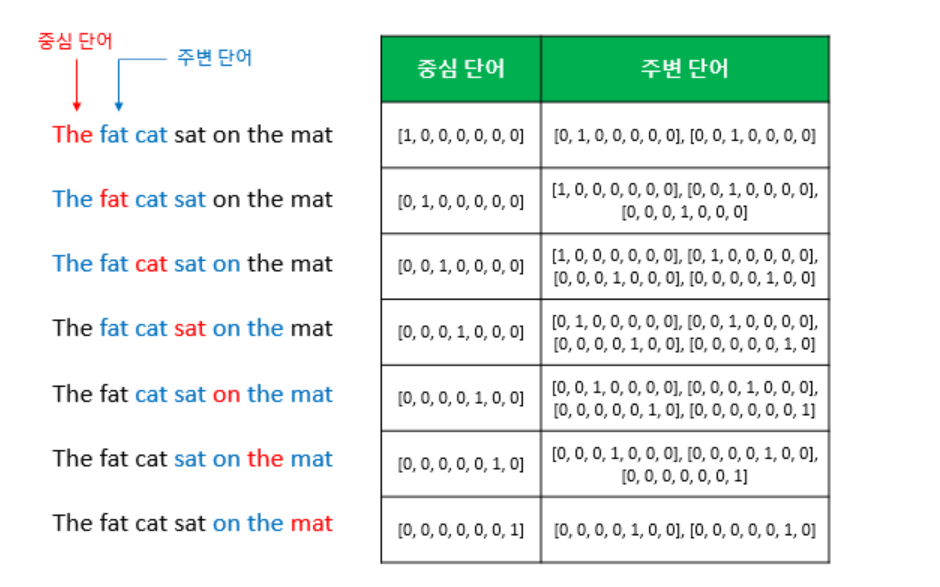

윈도우 크기가 정해지면 윈도우를 옆으로 움직여서 주변 단어와 중심 단어의 선택을 변경해가며 학습을 위한 데이터 셋을 만드는데 이 방법을 **슬라이딩 윈도우(sliding window)** 라고 합니다.

위 그림에서 좌측의 중심 단어와 주변 단어의 변화는 윈도우 크기가 2일때, 슬라이딩 윈도우가 어떤 식으로 이루어지면서 데이터 셋을 만드는지 보여줍니다. **Word2Vec** 에서 입력은 모두 원-핫 벡터가 되어야 하는데, 우측 그림은 중심 단어와 주변 단어를 어떻게 선택했을 때에 따라서 각각 어떤 원-핫 벡터가 되는지를 보여줍니다. 위 그림은 결국 CBOW를 위한 전체 데이터 셋을 보여주는 것입니다.

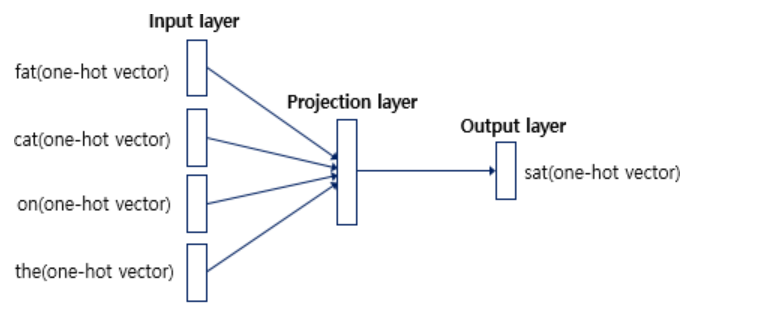

CBOW의 인공 신경망을 간단히 도식화하면 위와 같습니다. 입력층(Input layer)의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터가 들어가게 되고, 출력층(Output layer)에서 예측하고자 하는 중간 단어의 원-핫 벡터가 레이블로서 필요합니다.

위 그림에서 알 수 있는 사실은 Word2Vec은 은닉층이 다수인 딥 러닝(deep learning) 모델이 아니라 **은닉층이 1개인 얕은 신경망(shallow neural network)** 이라는 점입니다. 또한 Word2Vec의 은닉층은 일반적인 은닉층과는 달리 활성화 함수가 존재하지 않으며 **룩업 테이블** 이라는 연산을 담당하는 층으로 **투사층(projection layer)** 이라고 부르기도 합니다.

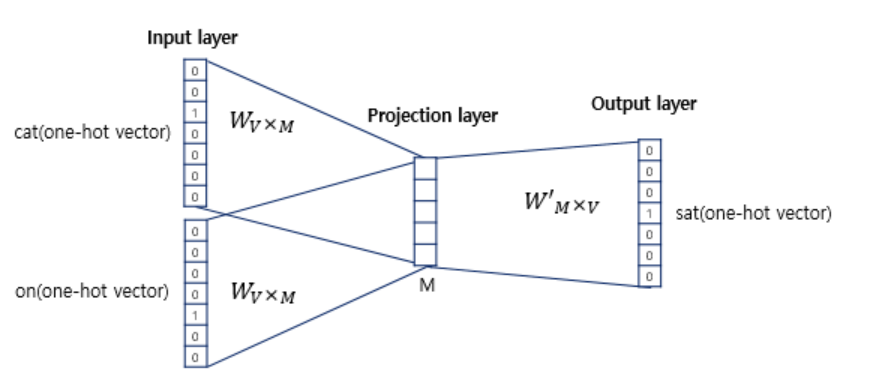

CBOW의 인공 신경망을 좀 더 확대하여, 동작 메커니즘에 대해서 상세하게 알아보겠습니다. 이 그림에서 주목해야할 것은 두 가지 입니다. 하나는 **투사층의 크기가 M** 이라는 점입니다. CBOW에서 투사층의 크기 M은 **임베딩하고 난 벡터의 차원** 이 됩니다. 위의 그림에서 투사층의 크기는 M=5이므로 CBOW를 수행하고나서 얻는 각 단어의 임베딩 벡터의 차원은 5가 될 것입니다.

두번째는 입력층과 투사층 사이의 가중치 W는 V × M 행렬이며, 투사층에서 출력층사이의 가중치 W'는 M × V 행렬이라는 점입니다. 여기서 V는 단어 집합의 크기를 의미합니다. 즉, 위의 그림처럼 원-핫 벡터의 차원이 7이고, M은 5라면 가중치 W는 7 × 5 행렬이고, W'는 5 × 7 행렬이 될 것입니다. 주의할 점은 이 두 행렬은 동일한 행렬을 전치(transpose)한 것이 아니라, 서로 다른 행렬이라는 점입니다. 인공 신경망의 훈련 전에 이 가중치 행렬 W와 W'는 랜덤 값을 가지게 됩니다. CBOW는 주변 단어로 중심 단어를 더 정확히 맞추기 위해 계속해서 이 W와 W'를 학습해가는 구조입니다.

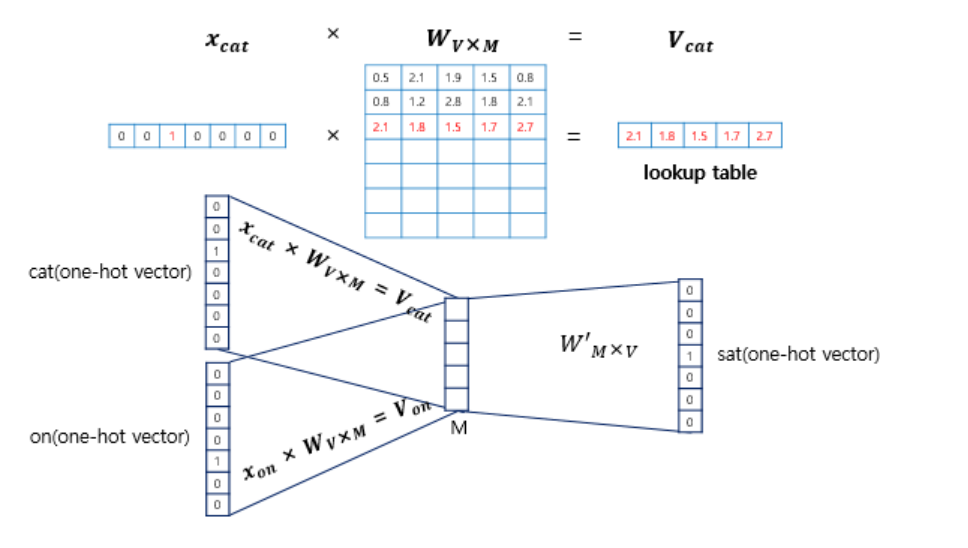

입력으로 들어오는 주변 단어의 원-핫 벡터와 가중치 W행렬의 곱이 어떻게 이루어지는지 보겠습니다. 위 그림에서는 각 주변 단어의 원-핫 벡터를 $x$로 표기하였습니다. 입력 벡터는 원-핫 벡터입니다. i번째 인덱스에 1이라는 값을 가지고 그 외의 0의 값을 가지는 입력 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일합니다. 이 작업을 **룩업 테이블(lookup table)** 이라고 합니다. 앞서 CBOW의 목적은 W와 W'를 잘 훈련시키는 것이라고 언급한 적이 있는데, 그 이유가 여기서 **lookup해온 W의 각 행벡터가 Word2Vec 학습 후에는 각 단어의 M차원의 임베딩 벡터로 간주** 되기 때문입니다.

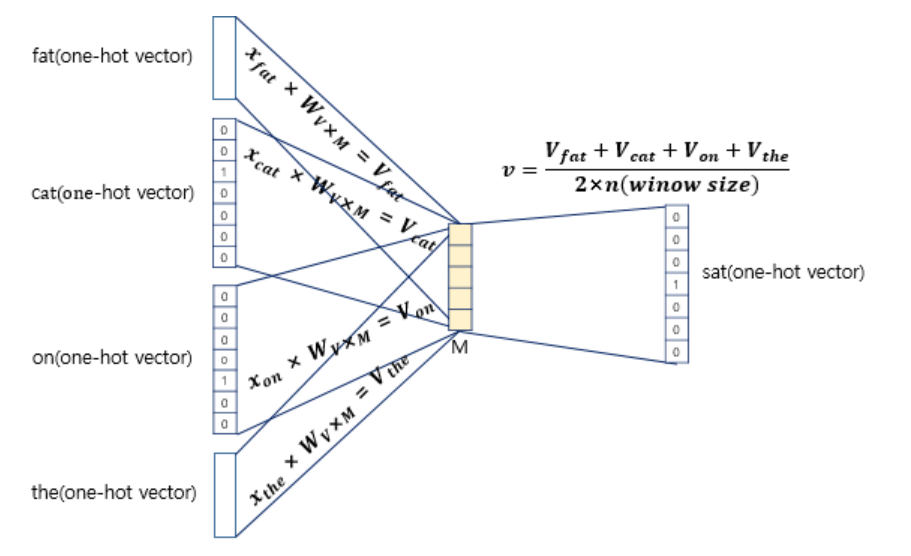

이렇게 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구하게 됩니다. 만약 윈도우 크기 n=2라면, 입력 벡터의 총 개수는 2n이므로 중간 단어를 예측하기 위해서는 총 4개가 입력 벡터로 사용됩니다. 그렇기 때문에 평균을 구할 때는 4개의 결과 벡터에 대해서 평균을 구하게 됩니다. 투사층에서 벡터의 평균을 구하는 부분은 CBOW가 Skip-Gram과 다른 차이점이기도 합니다. 뒤에서 보게되겠지만, Skip-Gram은 입력이 중심 단어 하나이기때문에 투사층에서 벡터의 평균을 구하지 않습니다.

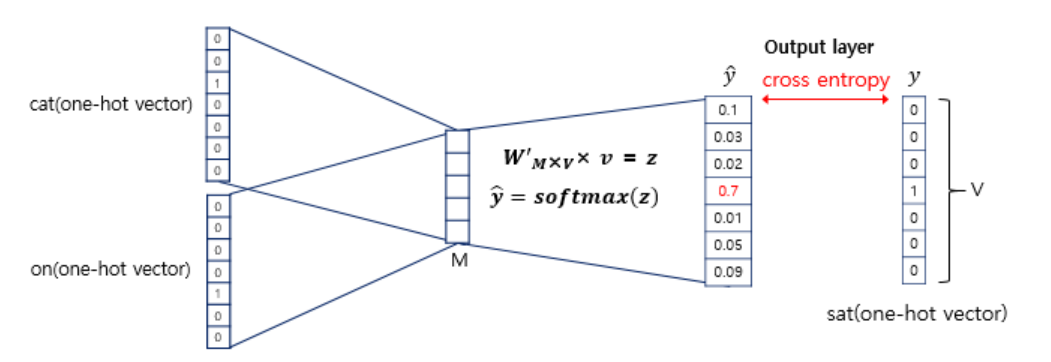

이렇게 구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해집니다. 곱셈의 결과로는 원-핫 벡터들과 차원이 V로 동일한 벡터가 나옵니다. 만약 입력 벡터의 차원이 7이었다면 여기서 나오는 벡터도 마찬가지입니다.

이 벡터에 CBOW는 **소프트맥스(softmax) 함수** 를 지나면서 벡터의 각 원소들의 값은 0과 1사이의 실수로, 총 합은 1이 됩니다. 다중 클래스 분류 문제를 위한 일종의 스코어 벡터(score vector)입니다. 스코어 벡터의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 중심 단어일 확률을 나타냅니다. 그리고 이 스코어 벡터의 값은 레이블에 해당하는 벡터인 중심 단어 원-핫 벡터의 값에 가까워져야 합니다. 스코어 벡터를 $ \hat{y} $라고 하겠습니다. 중심 단어의 원-핫 벡터를 $y$로 했을 때, 이 두 벡터값의 오차를 줄이기위해 CBOW는 **손실 함수(loss function)로 크로스 엔트로피(cross-entropy) 함수** 를 사용합니다. 크로스 엔트로피 함수에 중심 단어인 원-핫 벡터와 스코어 벡터를 입력값으로 넣고, 이를 식으로 표현하면 다음과 같습니다. 아래의 식에서 V는 단어 집합의 크기입니다.

$$cost(\hat{𝑦}, y) = -\sum_{j=1}^{V}y_{j}\ log(\hat{𝑦_{j}})$$

**역전파(Back Propagation)** 를 수행하면 W와 W'가 학습이 되는데, 학습이 다 되었다면 M차원의 크기를 갖는 W의 행렬의 행을 각 단어의 임베딩 벡터로 사용하거나 W와 W' 행렬 두 가지 모두를 가지고 임베딩 벡터를 사용하기도 합니다.

### **4. Skip-gram**
CBOW에서는 주변 단어를 통해 중심 단어를 예측했다면, Skip-gram은 중심 단어에서 주변 단어를 예측합니다. 앞서 언급한 예문에 대해서 동일하게 윈도우 크기가 2일 때, 데이터셋은 다음과 같이 구성됩니다.

![image](https://wikidocs.net/images/page/22660/skipgram_dataset.PNG)

인공 신경망을 도식화해보면 아래와 같습니다.


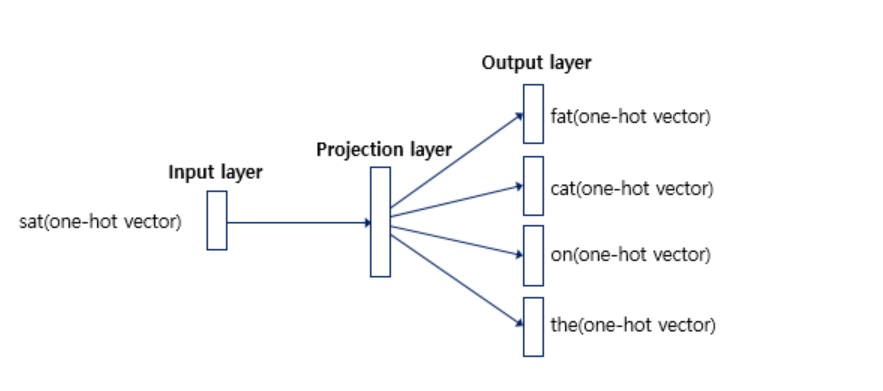

중심 단어에 대해서 주변 단어를 예측하므로 투사층에서 벡터들의 평균을 구하는 과정은 없습니다. 여러 논문에서 성능 비교를 진행했을 때 전반적으로 Skip-gram이 CBOW보다 성능이 좋다고 알려져 있습니다.

### **5. NNLM Vs. Word2Vec**

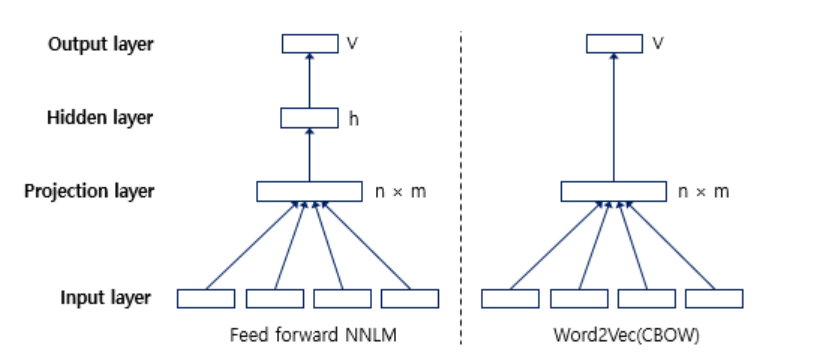

워드 임베딩의 개념 자체는 **피드 포워드 신경망 언어 모델(NNLM)** 을 설명하며 이미 학습한 적이 있습니다. NNLM은 단어 벡터 간 유사도를 구할 수 있도록 워드 임베딩의 개념을 도입하였고, 워드 임베딩 자체에 집중하여 **NNLM의 느린 학습 속도와 정확도를 개선하여 탄생한 것이 Word2Vec** 입니다.

NNLM과 Word2Vec의 차이를 비교해봅시다. 우선 예측하는 대상이 달라졌습니다. NNLM은 다음 단어를 예측하는 언어 모델이 목적이므로 다음 단어를 예측하지만, Word2Vec(CBOW)은 워드 임베딩 자체가 목적이므로 다음 단어가 아닌 중심 단어를 예측하게 하여 학습합니다. 중심 단어를 예측하므로 NNLM이 예측 단어의 이전 단어들만을 참고하였던 것과는 달리, Word2Vec은 예측 단어의 전, 후 단어들을 모두 참고합니다.

구조도 달라졌습니다. 위의 그림은 n을 학습에 사용하는 단어의 수, m을 임베딩 벡터의 차원, h를 은닉층의 크기, V를 단어 집합의 크기라고 하였을 때 NNLM과 Word2Vec의 차이를 보여줍니다. Word2Vec은 우선 NNLM에 존재하던 활성화 함수가 있는 은닉층을 제거하였습니다. 이에 따라 투사층 다음에 바로 출력층으로 연결되는 구조입니다.

Word2Vec이 NNLM보다 학습 속도에서 강점을 가지는 이유는 은닉층을 제거한 것뿐만 아니라 추가적으로 사용되는 기법들 덕분이기도 합니다. 대표적인 기법으로 계층적 소프트맥스(hierarchical softmax)와 네거티브 샘플링(negative sampling)이 있는데 이 책에서는 네거티브 샘플링에 대해서 설명합니다. 이는 '네거티브 샘플링을 이용한 Word2Vec 구현' 실습을 참고바랍니다. Word2Vec과 NNLM의 연산량을 비교하여 학습 속도가 왜 차이나는지 이해해봅시다.

우선 입력층에서 투사층, 투사층에서 은닉층, 은닉층에서 출력층으로 향하며 발생하는 NNLM의 연산량을 보겠습니다.

* **NNLM** : $ (n × m) + (n × m × h) + (h × V) $  
  
추가적인 기법들까지 사용하였을 때 Word2Vec은 출력층에서의 연산에서 $V$ 를 $log(V)$ 로 바꿀 수 있는데 이에 따라 Word2Vec의 연산량은 아래와 같으며 이는 NNLM보다 훨씬 빠른 학습 속도를 가집니다.

* **Word2Vec** :   $(n × m) + (m × log(V))$


  
마지막 편집일시 : 2022년 11월 29일 5:11 오후